In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [16]:
# BEGIN: Hyperparameter optimization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model_lr = grid_search.best_estimator_
best_params_lr = grid_search.best_params_

print(f"Best parameters: {best_params}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

Best parameters: {'C': 100, 'solver': 'liblinear'}
Best cross-validated accuracy: 0.9594


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
from sklearn.model_selection import GridSearchCV
model_name = "Logistic Regression"
print(f"Đang huấn luyện {model_name}...")

# Fit the best model on the training data
best_model_lr.fit(X_train, y_train)
y_pred = best_model_lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.4f}')

# END: Hyperparameter optimization

Đang huấn luyện Logistic Regression...

Độ chính xác (Accuracy) của Logistic Regression: 96.43%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.75      0.75      0.75         4

    accuracy                           0.96        56
   macro avg       0.87      0.87      0.87        56
weighted avg       0.96      0.96      0.96        56

------------------------------
F1_Score: 0.9643
Accuracy Score: 0.9643


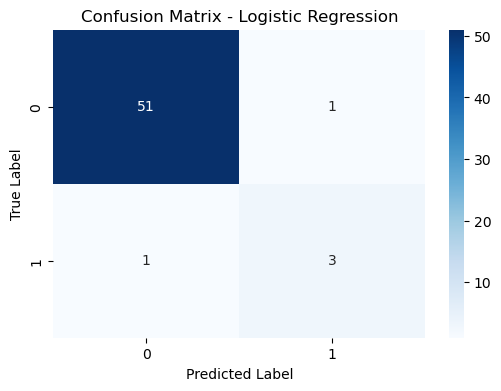

In [15]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()